<a href="https://colab.research.google.com/github/CARC2806/TI3002C.101/blob/main/A00833458_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Lab2/Updated_Dataset.xlsx'
db = pd.read_excel(file_path)

In [ ]:
likert = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neither Agree nor Disagree': 3,
    'Ni deacuerdo ni en desacuerdo': 3,
    'Agree': 4,
    "Strongly Agree": 5
}
db.replace(likert, inplace=True)

In [ ]:
df = pd.DataFrame()
df['ID'] = db['ID']
df['Gender']=db['Gender']
df['Systematic_thinking'] = db.iloc[:, 9:14].mean(axis=1).round(1)
df['Scientific_thinking'] = db.iloc[:, 15:21].mean(axis=1).round(1)
df['Critical_thinking'] = db.iloc[:, 22:27].mean(axis=1).round(1)
df['Innovative_thinking'] = db.iloc[:, 28:33].mean(axis=1).round(1)
df['Complex_thinking'] = df.iloc[:, 2:5].mean(axis=1).round(1)
df['Gender'].value_counts()

,count
Gender,
Man,679
Women,468
I prefer not to answer,6
Non-binary,5


#Lab 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

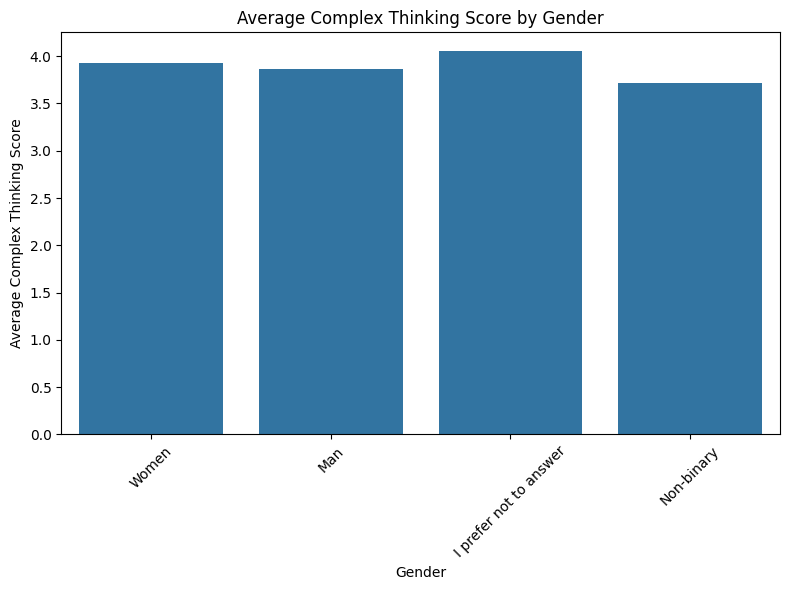

ANOVA Table:
               sum_sq      df         F    PR(>F)
C(Gender)    1.296756     3.0  1.248061  0.290974
Residual   398.982370  1152.0       NaN       NaN
There is no significant difference between the groups.


In [ ]:
# Group the data by Gender and calculate the mean Complex_Thinking scores
group_means = df.groupby('Gender')['Complex_thinking'].mean()

# Create the bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Complex_thinking', data=df, estimator='mean', errorbar=None)
plt.title('Average Complex Thinking Score by Gender')
plt.ylabel('Average Complex Thinking Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA
model = ols('Complex_thinking ~ C(Gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Check if p-value < 0.05, meaning there's a significant difference
if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("There is a significant difference between the groups.")

    # Perform Tukey's HSD test for pairwise comparisons
    tukey = pairwise_tukeyhsd(df['Complex_thinking'], df['Gender'])
    print(tukey)
else:
    print("There is no significant difference between the groups.")

The F-statistic is 1.25, and the p-value is 0.29. Since the p-value is higher than 0.05, we can't say there's a significant difference between the groups. So, there's no need to do any further pair-wise comparisons because none of the groups show a significant difference.

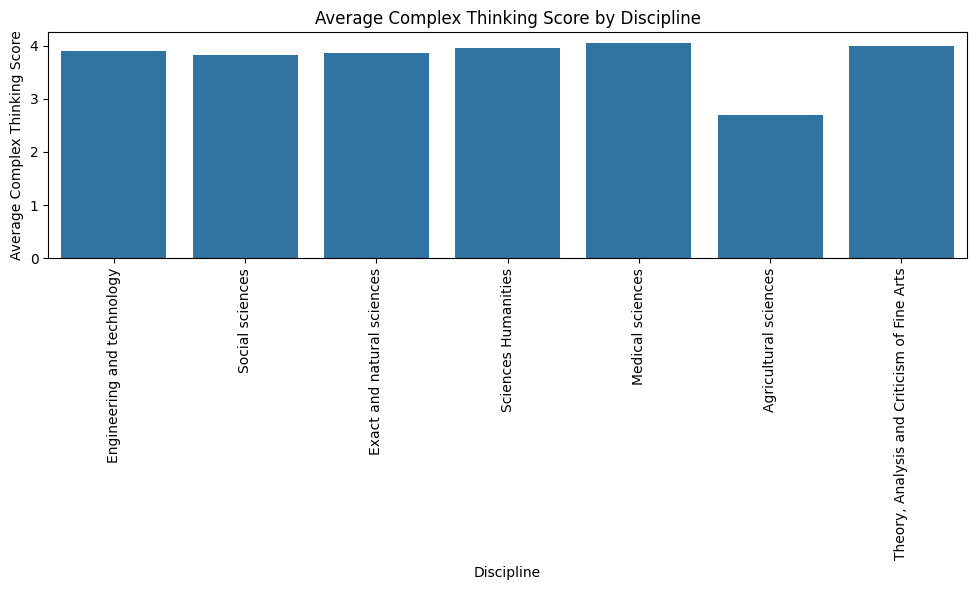

ANOVA Table:
                   sum_sq      df         F  PR(>F)
C(Discipline)    4.419193     6.0  2.137816  0.0467
Residual       395.859933  1149.0       NaN     NaN
There is a significant difference between the groups.
                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
          group1                              group2                   meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------------------------------------
     Agricultural sciences                  Engineering and technology   1.2075 0.3802 -0.5274 2.9424  False
     Agricultural sciences                  Exact and natural sciences   1.1592 0.4378 -0.5833 2.9016  False
     Agricultural sciences                            Medical sciences   1.3514 0.2587 -0.4056 3.1083  False
     Agricultural sciences                         Sciences Humanities   1.2631 0.3324 -0.4838   3.01  False
     Agricultu

In [ ]:
df['Discipline'] = db['Discipline']
# Filter the relevant disciplines
relevant_disciplines = [
    "Engineering and technology",
    "Social sciences",
    "Exact and natural sciences",
    "Sciences Humanities",
    "Medical sciences",
    "Agricultural sciences",
    "Theory, Analysis and Criticism of Fine Arts"
]

# Filter the dataset to include only the relevant disciplines
df_filtered = df[df['Discipline'].isin(relevant_disciplines)]

# Group the data by Discipline and calculate the mean Complex_Thinking scores
group_means = df_filtered.groupby('Discipline')['Complex_thinking'].mean()

# Create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Discipline', y='Complex_thinking', data=df_filtered, estimator='mean', errorbar=None)
plt.title('Average Complex Thinking Score by Discipline')
plt.ylabel('Average Complex Thinking Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Drop missing values if necessary
df_filtered_clean = df_filtered.dropna(subset=['Complex_thinking'])

# Re-run the ANOVA and Tukey test
model = ols('Complex_thinking ~ C(Discipline)', data=df_filtered_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("There is a significant difference between the groups.")
    tukey = pairwise_tukeyhsd(df_filtered_clean['Complex_thinking'], df_filtered_clean['Discipline'])
    print(tukey)
else:
    print("There is no significant difference between the groups.")

There is a significant difference in the mean scores between disciplines since the p-value is 0.0467, which is less than 0.05. However, when we look at the pair-wise comparisons using Tukey's HSD, none of the pairs have a p-adjusted (p-adj) value below 0.05. This means that even though the overall ANOVA shows a significant difference, we can't identify any specific pair of disciplines that are significantly different from each other based on this post-hoc test.

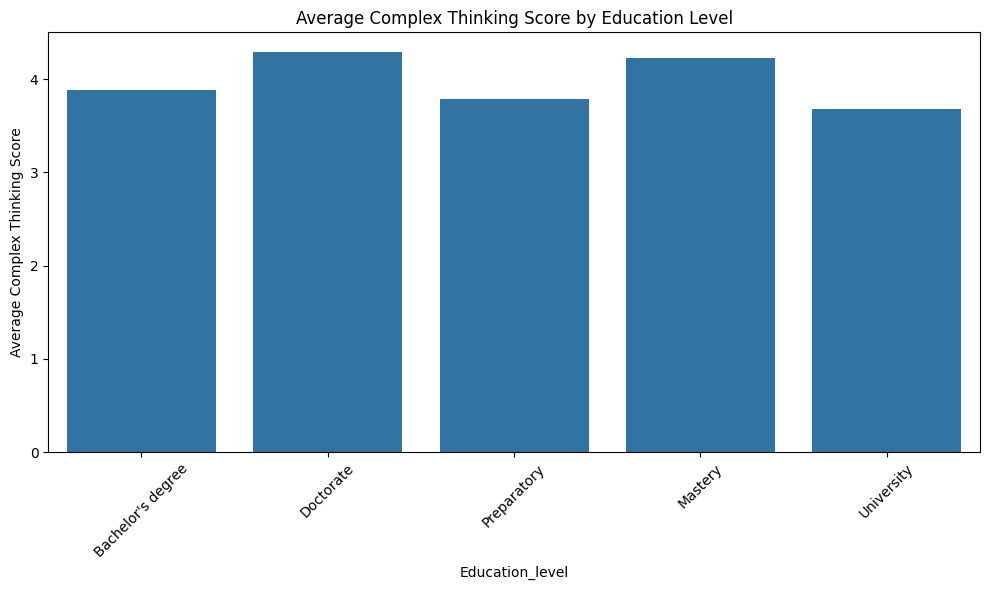

ANOVA Table:
                        sum_sq      df          F        PR(>F)
C(Education_level)   18.874304     4.0  14.239676  2.383100e-11
Residual            381.404822  1151.0        NaN           NaN
There is a significant difference between the groups.
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
      group1         group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
Bachelor's degree   Doctorate   0.4097    0.0  0.1776  0.6418   True
Bachelor's degree     Mastery   0.3489 0.0001  0.1409   0.557   True
Bachelor's degree Preparatory  -0.0934 0.1244  -0.201  0.0143  False
Bachelor's degree  University  -0.2015 0.6928 -0.6259  0.2228  False
        Doctorate     Mastery  -0.0608 0.9817 -0.3614  0.2399  False
        Doctorate Preparatory   -0.503    0.0 -0.7453 -0.2608   True
        Doctorate  University  -0.6112 0.0043 -1.0878 -0.1346   True
          Mastery Preparatory  -0.4423    0.0 -0.66

In [ ]:
df['Education_level'] = db['Education Level']

# Filter the relevant education levels
Relevant_education_levels = [
    "Bachelor's degree",
    "Doctorate",
    "Preparatory",
    "Mastery",
    "University"
]

# Filter the dataset to include only the relevant education levels
Df_filtered = df[df['Education_level'].isin(Relevant_education_levels)]

# Group the data by Education Level and calculate the mean Complex_thinking scores
Group_means = Df_filtered.groupby('Education_level')['Complex_thinking'].mean()

# Create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Education_level', y='Complex_thinking', data=Df_filtered, estimator='mean', errorbar=None)
plt.title('Average Complex Thinking Score by Education Level')
plt.ylabel('Average Complex Thinking Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Df_filtered_clean = Df_filtered.dropna(subset=['Complex_thinking'])

#ANOVA and Tukey test
model = ols('Complex_thinking ~ C(Education_level)', data=Df_filtered_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("There is a significant difference between the groups.")
    tukey = pairwise_tukeyhsd(Df_filtered_clean['Complex_thinking'], Df_filtered_clean['Education_level'])
    print(tukey)
else:
    print("There is no significant difference between the groups.")

There's a significant difference in the mean scores between different education levels because the p-value is very small (almost zero), which is less than 0.05. When we look at the Tukey HSD test to compare each group, we find some education levels have significant differences between them. Specifically, Bachelor's degree is significantly different from Doctorate and Mastery. Doctorate also differs significantly from Preparatory and University, and Mastery differs significantly from Preparatory and University. The pairs that are significantly different are shown with a "True" in the "reject" column, meaning there's a real difference between those groups. The rest of the pairs do not show significant differences.

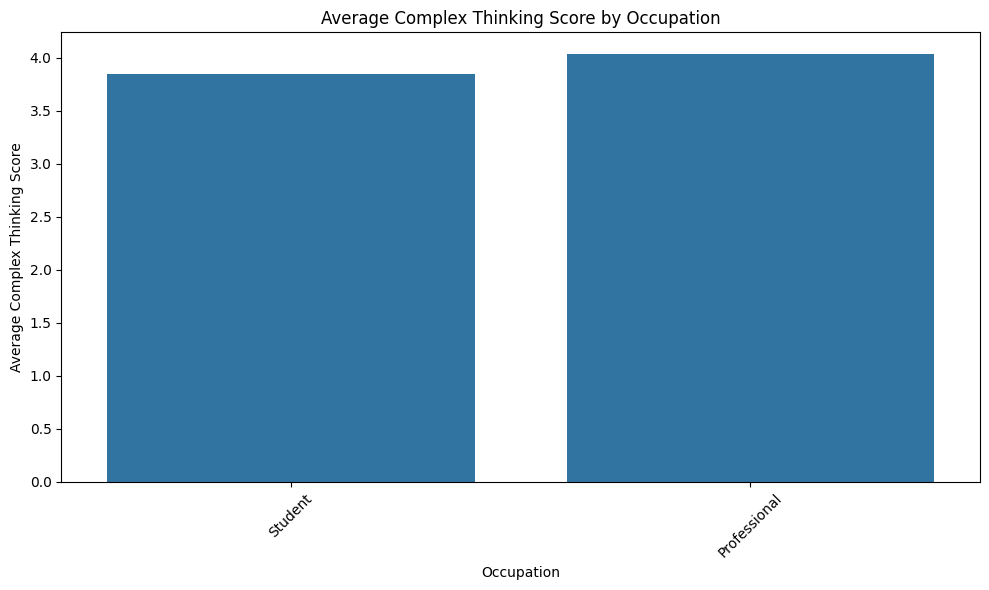

ANOVA Table:
                   sum_sq      df        F    PR(>F)
C(Occupation)    6.915128     1.0  20.2867  0.000007
Residual       393.363998  1154.0      NaN       NaN
There is a significant difference between the groups.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1     group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------------
Professional Student  -0.1901   0.0 -0.2729 -0.1073   True
----------------------------------------------------------


In [ ]:
df['Occupation']=db['Occupation']

# Group the data by Education Level and calculate the mean Complex_thinking scores
group_means = df.groupby('Occupation')['Complex_thinking'].mean()

# Create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Complex_thinking', data=df, estimator='mean', errorbar=None)
plt.title('Average Complex Thinking Score by Occupation')
plt.ylabel('Average Complex Thinking Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_filtered_o = df.dropna(subset=['Complex_thinking'])

#ANOVA and Tukey test
model = ols('Complex_thinking ~ C(Occupation)', data=df_filtered_o).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("There is a significant difference between the groups.")
    tukey = pairwise_tukeyhsd(df_filtered_o['Complex_thinking'], df_filtered_o['Occupation'])
    print(tukey)
else:
    print("There is no significant difference between the groups.")

The ANOVA shows that there's a significant difference between Professionals and Students. The Tukey test also confirms this difference, with a p-value of 0.0. So, there's a clear difference in scores between Professionals and Students, with Students having higher scores by about 0.19 on average.